In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split

Using matplotlib backend: Qt5Agg


In [44]:
#Load the csv file containing the Titanic train data, and create a dataframe 'df'.  
#This data will be used to train the model. The csv file must be in same directory as this Jupyter Notebook

In [45]:
df = pd.read_csv('train.csv')

In [46]:
#Check the first 10 rows of the dataframe to see the columns, and examples of their data.

In [47]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [53]:
#Looking at the first 10 rows of data above, we can note the following regarding the data:
#PassengerID - This is essentially the primary key for the data.  We will not be using this in our classification model though.
#Survived - This is our answer key, and will be used for the 'y' values.
#Pclass - Ok as is
#Name - Not useful for our model
#Sex/Gender - We will need to convert this to numerical data, e.g. 1/0 for our model
#Age - Ok as is
#Sibsp - Ok as is
#Parch - Ok as is
#Ticket - Not required for our model, ticket number has no relationsip with passengers
#Fare - Ok as is
#Cabin - Lots of missing data, we will have to investigate this later and add missing data, or omit
#Embarked

In [54]:
#Use df.info() to check the info of the dataframe, to see the number of rows, datatypes, etc.:

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [56]:
#As I saw in the first 10 rows of data, there are some missing 'NaN' (N/A) values.  In the df.info() command, we can see that
#the 'Age' and 'Cabin' columns have only 714/891 and 204/891 rows of data respectively.  This can also be seen by 
#throwing the data into a heatmap to better visualize the gaps.

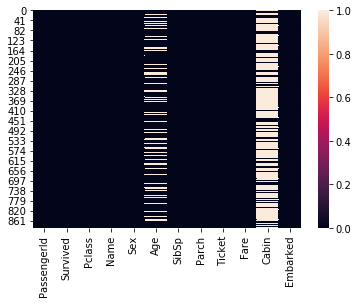

In [57]:
sns.heatmap(df.isnull())

In [58]:
#As can be seen above, the 'Age' column has a bit of data missing (20%)
#The 'Cabin' has a huge amount of missing data (77% missing)
#Let's look closer at the 'Cabin' column to see if this is even worth keeping.

In [59]:
#Query the 'Cabin' values, omitting those that are null.

In [60]:
df['Cabin'][df['Cabin'].notnull()]

1              C85
3             C123
6              E46
10              G6
11            C103
21             D56
23              A6
27     C23 C25 C27
31             B78
52             D33
54             B30
55             C52
61             B28
62             C83
66             F33
75           F G73
88     C23 C25 C27
92             E31
96              A5
97         D10 D12
102            D26
110           C110
118        B58 B60
123           E101
124            D26
128          F E69
136            D47
137           C123
139            B86
148             F2
          ...     
751           E121
759            B77
763        B96 B98
765            D11
772            E77
776            F38
779             B3
781            B20
782             D6
789        B82 B84
796            D17
802        B96 B98
806            A36
809             E8
815           B102
820            B69
823           E121
829            B28
835            E49
839            C47
849            C92
853         

In [40]:
#The 'Cabin' data could be useful, where I split the cabin column, to create two new columns and classify using deck and room number
#However, too much data is missing currently to make it useful.  To increase accuracy I could run two models, 1- using
#'Cabin' data if it exists. and 2- not using cabin data if it's missing, but that's starting to get beyond the scope of the problem.
#The 'Cabin' data will be omitted for now, and I may use in the future to better fine-tune the model, although it doesn't have a lot of data.

In [62]:
#Before I start transforming the data, I'd like to do a bit of exploratory data analysis.

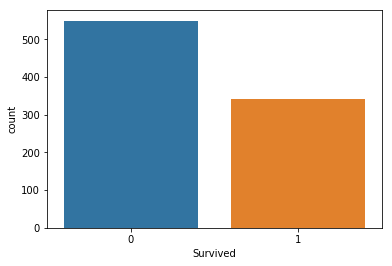

In [69]:
sns.countplot(x='Survived', data=df)

In [66]:
round(df['Survived'].sum() / df['Survived'].count(),2)

0.38

In [ ]:
#As can be seen above, only 38% of passengers in the training set managed to survive.

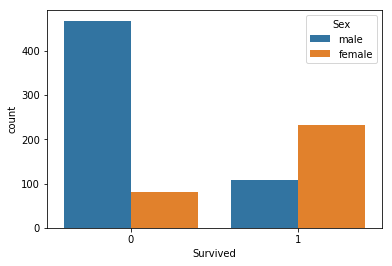

In [71]:
sns.countplot(x='Survived', data=df, hue='Sex')

In [94]:
(df['Survived'] & (df['Sex'] == 'male')).sum()

109

In [ ]:
#Drilling down deeper, those who died, were more likely to be male, as can be seen by the countplot above.

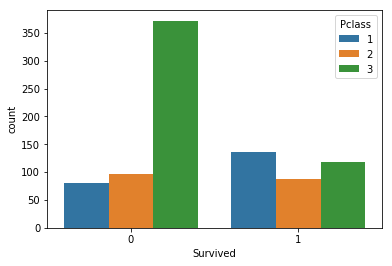

In [99]:
sns.countplot(x='Survived', data=df, hue='Pclass')

In [101]:
#As can be seen from the graph above, the people who died were more likely to be from 3rd class, which were the cheapest tickets.

In [102]:
#Let's investigate ticket price to see if there is a correlation.

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


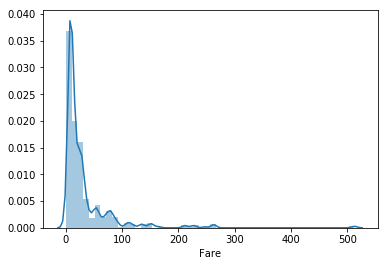

In [109]:
sns.distplot(df['Fare'])

ValueError: max must be larger than min in range parameter.

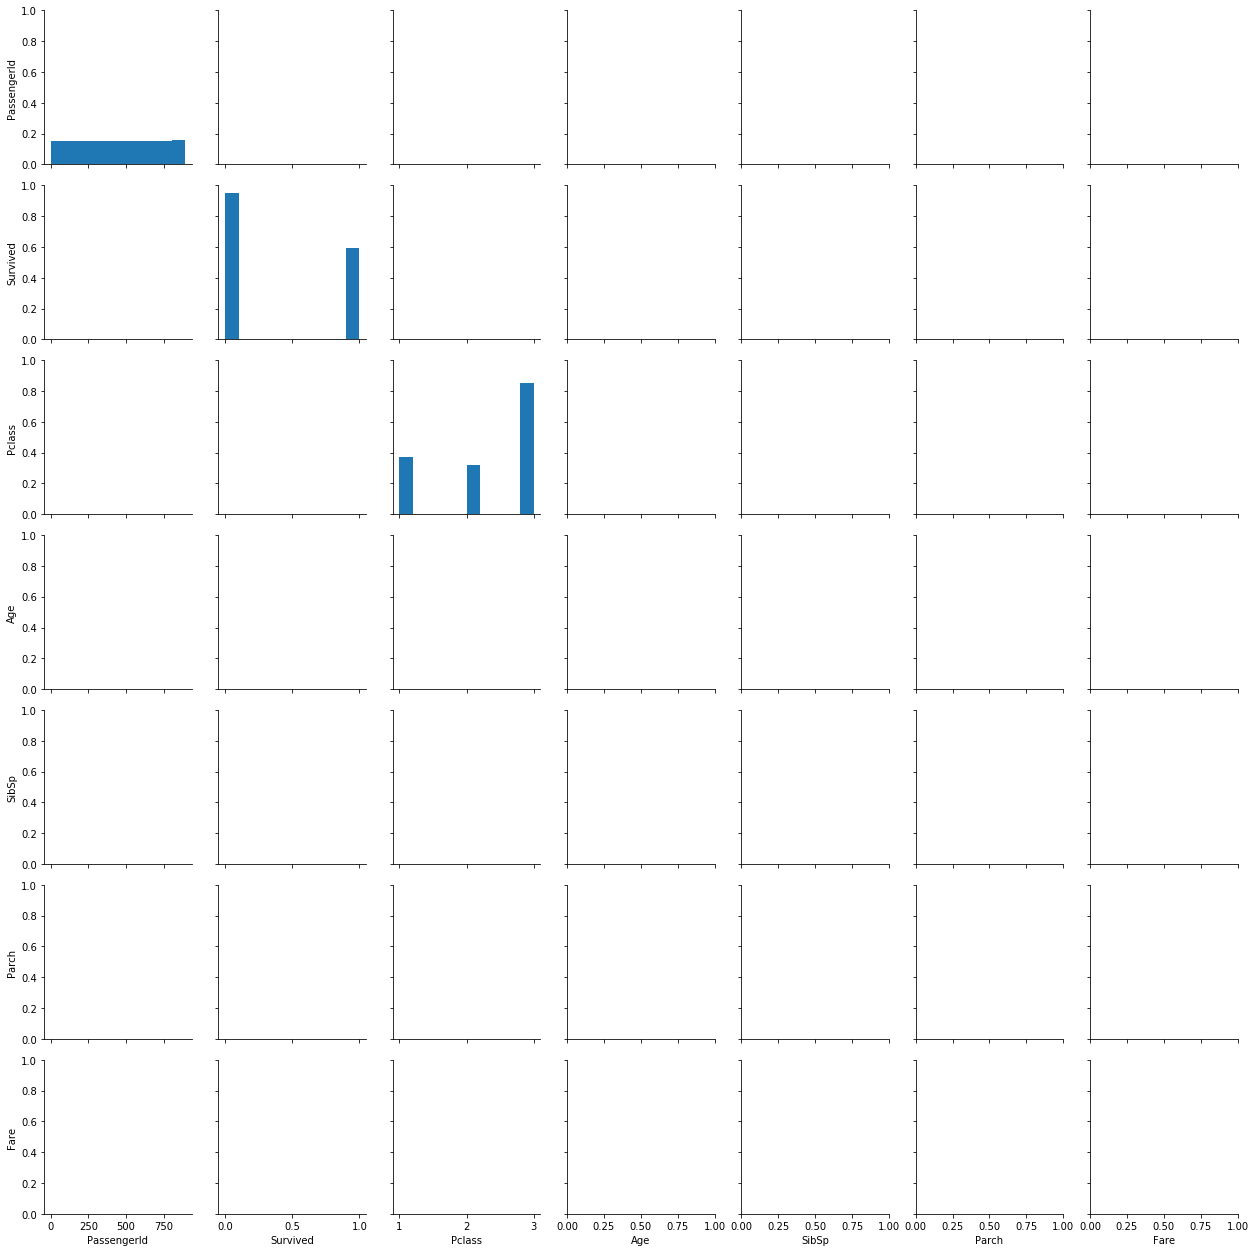

In [95]:
sns.pairplot(df)

In [79]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [80]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
y = df['Survived']
X = df[['Pclass'],[]]